In [2]:
#Import everything you need
from astropy.io import fits
from astropy.table import Table, Column
from photutils import CircularAperture, aperture_photometry
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Import all the files
hdu_filenames = glob.glob('//data1//tso_analysis//wlp8_sub_data//*.fits')
hdu_filenames

['//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I001.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I002.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I003.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I004.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I005.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I006.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I007.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I008.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I009.slp.fits',
 '//data1/

In [22]:
#Generate flux & time of each image for all aperture radii
center = (167,161)
t = Table(names=('Flux','Time','Aperture Radius'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0,:,:]
    mask = np.isnan(image2d) == True
    radius = np.arange(5,200,1)
    for r in radius:
        aperture = CircularAperture(center, r)
        phot_table = aperture_photometry(image2d, aperture, mask = mask)
        header = hdu[0].header
        time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
        a = [phot_table[0][0]]
        b = time
        c = r
        t.add_row([a,b,c])
    hdu.close()
t

Flux,Time,Aperture Radius
float64,float64,float64
11259.4485096,0.0,5.0
12945.3590564,0.0,6.0
15286.7688115,0.0,7.0
19035.1914068,0.0,8.0
24404.4468714,0.0,9.0
30668.6983373,0.0,10.0
37210.0983617,0.0,11.0
43924.3332615,0.0,12.0
52122.0708207,0.0,13.0


In [23]:
# Generate Standard deviation of all images for each aperture radii
# Generate Median flux of all images for each aperture radii (so that you can normalize standard deviation)
s = Table(names=('Median_Flux','St_Dev', 'Ap_Rad'))
for r in radius:
    indices = t['Aperture Radius'] == r
    st_dev = np.std(t["Flux"][indices])
    median_flux = np.median(t["Flux"][indices])
    s.add_row([median_flux,st_dev,r])
s

Median_Flux,St_Dev,Ap_Rad
float64,float64,float64
11402.1034837,89.0415995985,5.0
13116.5077302,122.709148813,6.0
15501.4850647,179.574991926,7.0
19325.9235549,216.285278943,8.0
24800.4946008,260.265355024,9.0
31167.6370867,321.180339028,10.0
37833.7314336,386.805846268,11.0
44658.9287596,464.972467869,12.0
52908.3200746,573.958515673,13.0


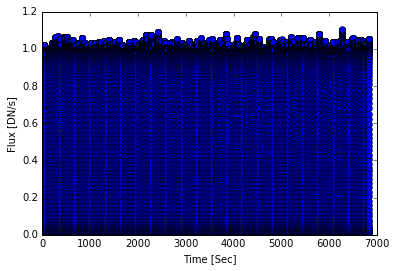

In [24]:
#Create light curve for all aperture radii
x = t['Time']
y = t['Flux']
normalized_y = y/np.median(y)
plt.plot(x, normalized_y, 'o')
plt.ylabel('Flux [DN/s]')
plt.xlabel('Time [Sec]')

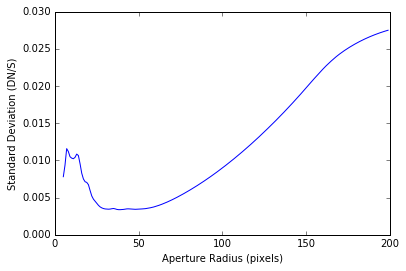

In [25]:
# Plot normalized standard deviation
u = s['Ap_Rad']
v = s['St_Dev']/s['Median_Flux']
plt.plot(u, v)
plt.ylabel('Standard Deviation (DN/S)')
plt.xlabel('Aperture Radius (pixels)')

In [26]:
# Find minimum deviation and the corresponding aperture radius
min_stdev = np.amin(v)
best_ap_rad = u[v.argmin()]
print "The minimum standard deviation is %f" % min_stdev
print "It occurs for the radius r = %f" % best_ap_rad

The minimum standard deviation is 0.003378
It occurs for the radius r = 39.000000


In [28]:
# Run the code for the best aperture radius
center = (167,161)
single_rad_data = Table(names=('Flux','Time'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0]
    mask = np.isnan(image2d) == True
    aperture = CircularAperture(center, r = 39)
    phot_table = aperture_photometry(image2d, aperture, mask = mask)
    header = hdu[0].header
    time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    single_rad_data.add_row([a,b])
    hdu.close()
single_rad_data

Flux,Time
float64,float64
1648212.75321,0.0
1650047.36377,22.38012
1659086.06569,44.76024
1651010.50639,67.14036
1650322.02808,89.52048
1649950.18671,111.9006
1654365.84388,134.28072
1650819.66527,156.66084
1652072.12513,179.04096


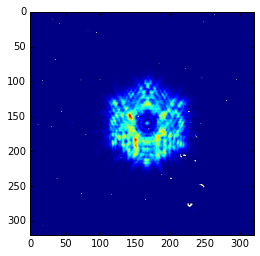

In [10]:
plt.imshow(image2d)  #ignore this line

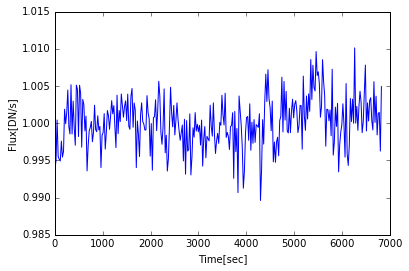

In [37]:
# Light curve of first data set without error bars
x = single_rad_data['Time']
y = single_rad_data['Flux']
first_data_plot = plt.plot(x, y/np.median(y))
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

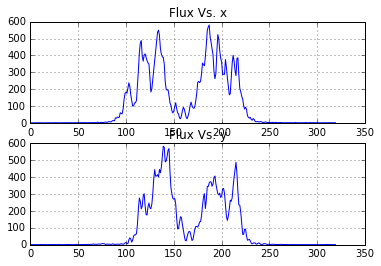

In [11]:
# slice the image horizontally & vertically through the center to measure amplitude, mean and st. dev of gaussian
plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d[:,162])
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d[164,:])
plt.grid(True)

In [12]:
from astropy.modeling import models, fitting # import models for fitting

In [13]:
# Create your x & y data for gaussian. This is basically the pixel plane of image and image2d gives the flux at every point. 
c, d = np.mgrid[:320,:320]
image2d.shape

(320, 320)

In [14]:
d.shape # ignore this line

(320, 320)

In [15]:
# Create your gaussian model
fit_g = fitting.LevMarLSQFitter()
gauss2D = models.Gaussian2D(amplitude = 100, x_mean = image2d.shape[1]/2, y_mean = image2d.shape[0]/2, x_stddev = 2, y_stddev = 2, theta = 0.0)
g = fit_g(gauss2D,c[161-5:161+5,167-5:167+5],d[161-5:161+5,167-5:167+5],image2d[161-5:161+5,167-5:167+5])
#the fitter function changes the parameters/inital conditions everytime it's called
g2 = fit_g(g,c[161-5:161+5,167-5:167+5],d[161-5:161+5,167-5:167+5],image2d[161-5:161+5,167-5:167+5])
print g2.parameters == g.parameters

[False False False False False False]


0.017801000013078799

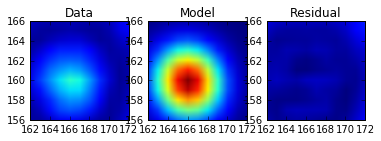

In [16]:
# fit the model to your data
plt.figure('figsize=12,12')
plt.subplot(1,3,1)
plt.xlim(167-5,167+5)
plt.ylim(161-5,161+5)
plt.imshow(image2d)
plt.title("Data")
plt.subplot(1,3,2)
plt.xlim(167-5,167+5)
plt.ylim(161-5,161+5)
plt.imshow(g2(c,d))
plt.title("Model")
plt.subplot(1,3,3)
plt.xlim(167-5,167+5)
plt.ylim(161-5,161+5)
plt.imshow(image2d - g2(c,d))
plt.title("Residual")

np.sum(image2d[161-5:161+5,167-5:167+5] - g2(c[161-5:161+5,167-5:167+5],d[161-5:161+5,167-5:167+5])) / image2d[161-5:161+5,167-5:167+5].sum()

In [67]:
# Calculate error (first data set)
gain = 2.2
errors_DNps = (np.sqrt((single_rad_data['Flux'])*header['INTTIME']*gain))/(gain*header['INTTIME'])
errors_normalized = errors_DNps/single_rad_data['Flux']
errors_normalized

0.000113748445067
0.00011368519169
0.000113375090257
0.000113652026841
0.000113675730941
0.000113688539497
0.000113536715448
0.000113658595957
0.000113615504673
0.000113293816534
0.000113403487263


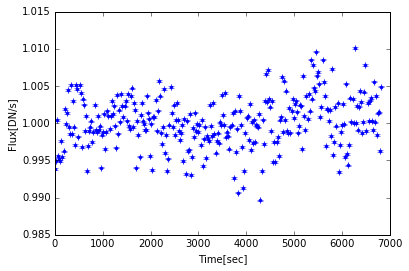

In [68]:
# Light curve of first data set with error bars
x = single_rad_data['Time']
y = single_rad_data['Flux']
plt.errorbar(x, y/np.median(y), xerr = 0, yerr = errors_normalized, fmt='.')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

#Generating white noise
# sigma = errors.mean()
# med = np.median(y)
# white = np.random.normal(med,sigma,y.size)
# plt.plot(x,white, 'o')

In [43]:
#Background Subtraction (Circular annulus)
from astropy.table import hstack
from photutils import CircularAnnulus
annular_apperture =CircularAnnulus(center, r_in = 90, r_out = 110)
rawflux_table = aperture_photometry(image2d, aperture, mask = mask)
bkgflux_table = aperture_photometry(image2d, annular_apperture, mask = mask)
phot_table = hstack([rawflux_table, bkgflux_table], table_names = ['raw','bkg'])

In [48]:
#Finding total Bkg within the circular apperture (not annular) and subtracting it from the data
bkg_mean = phot_table['aperture_sum_bkg']/annular_apperture.area()
bkg_sum = bkg_mean*aperture.area()
final_sum = phot_table['aperture_sum_raw'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
phot_table

aperture_sum_raw,xcenter_raw [1],ycenter_raw [1],aperture_sum_bkg,xcenter_bkg [1],ycenter_bkg [1],residual_aperture_sum
,,,,,,
float64,float64,float64,float64,float64,float64,float64
1666527.75168,167.0,161.0,26960.035583,167.0,161.0,1656276.19815


In [50]:
# **Everything above this line is for 1ST DATA SET, 1ST IMAGE PLANE**
# Everything below: 1st data set, 2nd image plane

In [46]:
#Generate flux & time of each image for all aperture radii (2ND IMAGE PLANE)
center = (167,161)
t_2 = Table(names=('Flux','Time','Aperture Radius'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d_2 = image[1]
    mask = np.isnan(image2d_2) == True
    radius = np.arange(5,200,1)
    for r in radius:
        aperture = CircularAperture(center, r)
        phot_table = aperture_photometry(image2d_2, aperture, mask = mask)
        header = hdu[0].header
        time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
        a = [phot_table[0][0]]
        b = time
        t_2.add_row([a,b,r])
    hdu.close()
t_2

Flux,Time,Aperture Radius
float64,float64,float64
84.5126968767,0.0,5.0
120.598914559,0.0,6.0
162.374083384,0.0,7.0
210.312043661,0.0,8.0
266.100394205,0.0,9.0
328.686823148,0.0,10.0
399.887967935,0.0,11.0
476.608987718,0.0,12.0
560.549375278,0.0,13.0


In [54]:
#2nd image plane
# Generate Standard deviation of all images for each aperture radii
# Generate Median flux of all images for each aperture radii (so that you can normalize standard deviation)
s_2 = Table(names=('Median_Flux','St_Dev', 'Ap_Rad'))
for r in radius:
    indices_2 = t_2['Aperture Radius'] == r
    st_dev_2 = np.std(t_2["Flux"][indices_2])
    median_flux_2 = np.median(t_2["Flux"][indices_2])
    s_2.add_row([median_flux_2,st_dev_2,r])
s_2

Median_Flux,St_Dev,Ap_Rad
float64,float64,float64
77.3673598425,14.8903091959,5.0
110.144040374,21.6877433037,6.0
148.249109556,29.5993187179,7.0
192.09957838,38.4880709905,8.0
242.92456929,48.7717274711,9.0
300.684956611,60.2802639373,10.0
364.51201772,73.0274524938,11.0
434.005323953,87.0400513683,12.0
509.938824306,102.158819552,13.0


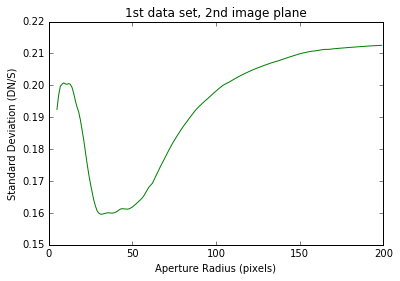

In [65]:
# Plot normalized standard deviation
u_2 = s_2['Ap_Rad']
v_2 = s_2['St_Dev']/s_2['Median_Flux']
plt.plot(u_2, v_2, 'g-')
plt.ylabel('Standard Deviation (DN/S)')
plt.xlabel('Aperture Radius (pixels)')
plt.title('1st data set, 2nd image plane')

In [56]:
# Find minimum deviation and the corresponding aperture radius
min_stdev_2 = np.amin(v_2)
best_ap_rad_2 = u_2[v_2.argmin()]
print "The minimum standard deviation is %f" % min_stdev_2
print "It occurs for the radius r = %f" % best_ap_rad_2

The minimum standard deviation is 0.159607
It occurs for the radius r = 31.000000


In [57]:
#2nd image plane of first data set
# Run the code for the best aperture radius
center = (167,161)
single_rad_data_2 = Table(names=('Flux','Time'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d_2 = image[1]
    mask = np.isnan(image2d_2) == True
    aperture = CircularAperture(center, r = 31)
    phot_table = aperture_photometry(image2d_2, aperture, mask = mask)
    header = hdu[0].header
    time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    single_rad_data_2.add_row([a,b])
    hdu.close()
single_rad_data_2

Flux,Time
float64,float64
3599.43325758,0.0
3244.18942235,22.38012
3324.95707014,44.76024
2993.39862728,67.14036
3447.49726487,89.52048
3692.55568344,111.9006
3628.71143593,134.28072
3444.74910142,156.66084
3114.87116183,179.04096


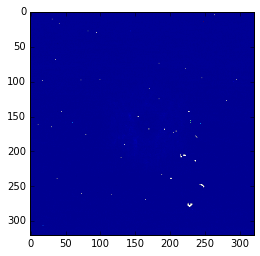

In [62]:
plt.imshow(image2d_2)

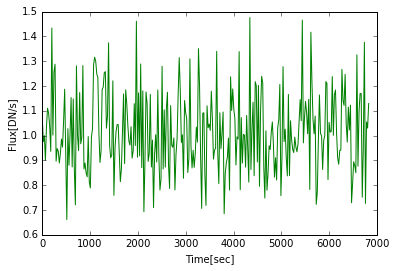

In [63]:
#2nd image plane
# Light curve of first data set without error bars
x_2 = single_rad_data_2['Time']
y_2 = single_rad_data_2['Flux']
plt.plot(x_2, y_2/np.median(y_2), 'g-')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

In [60]:
# Calculate error (first data set, 2nd image plane)
gain = 2.2
errors_DNps_2 = (np.sqrt((single_rad_data_2['Flux'])*header['INTTIME']*gain))/(gain*header['INTTIME'])
errors_normalized_2 = errors_DNps_2/single_rad_data_2['Flux']
errors_normalized_2

0.00243408108305
0.00256388771685
0.00253255614731
0.00266913061153
0.00248713946371
0.00240319259498
0.00242424153048
0.00248813136514
0.00261656820456
0.00211493913847
0.0025297812008


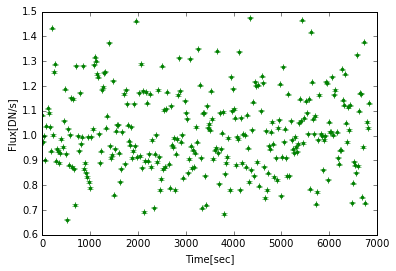

In [61]:
# Light curve of first data set, 2nd image plane with error bars
x_2 = single_rad_data_2['Time']
y_2 = single_rad_data_2['Flux']
plt.errorbar(x_2, y_2/np.median(y_2), xerr = 0, yerr = errors_normalized_2, fmt='g.')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

In [ ]:
# **Everything above this line is 1ST DATA SET, 2ND IMAGE PLANE**
# Everything below: 2nd data set, 1st image plane 

In [3]:
#Importing second data set
hdu_filenames_new = glob.glob('//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29//*slp.fits')
hdu_filenames_new

['//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I001.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I002.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I003.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I004.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2

In [19]:
#Generate flux & time of each image for all aperture radii (second data set)
center = (161,163)
t_new = Table(names=('Flux','Time','Aperture Radius'))
for hdus_new in hdu_filenames_new:
    hdu_new = fits.open(hdus_new)
    image_new = hdu_new[0].data
    image2d_new = image_new[0,:,:]
    mask = np.isnan(image2d_new) == True
    radius = np.arange(5,200,1)
    for r in radius:
        aperture = CircularAperture(center, r)
        phot_table = aperture_photometry(image2d_new, aperture, mask = mask)
        header_new = hdu_new[0].header
        time = [(header_new["NGROUP"] + 1) * header_new["TGROUP"] * (header_new["ON_NINT"] - 1)]
        a = [phot_table[0][0]]
        b = time
        c = r
        t_new.add_row([a,b,c])
    hdu_new.close()
t_new

Flux,Time,Aperture Radius
float64,float64,float64
9680.04841156,0.0,5.0
14647.9093,0.0,6.0
21307.1082671,0.0,7.0
29283.3450498,0.0,8.0
38705.2276883,0.0,9.0
49923.7302049,0.0,10.0
62829.8840877,0.0,11.0
77740.2783386,0.0,12.0
95761.2279251,0.0,13.0


In [6]:
# Second data set
# Generate Standard deviation of all images for each aperture radii
# Generate Median flux of all images for each aperture radii (so that you can normalize standard deviation)
s_new = Table(names=('Median_Flux','St_Dev', 'Ap_Rad'))
for r in radius:
    indices = t_new['Aperture Radius'] == r
    st_dev = np.std(t_new["Flux"][indices])
    median_flux = np.median(t_new["Flux"][indices])
    s_new.add_row([median_flux,st_dev,r])
s_new

Median_Flux,St_Dev,Ap_Rad
float64,float64,float64
10457.2336765,101.895887986,5.0
15582.0512635,147.050739616,6.0
22999.4574006,192.934354492,7.0
32807.3309642,241.845137761,8.0
44786.2489492,299.741529758,9.0
59204.1018037,403.238937039,10.0
75827.5122654,597.803532434,11.0
94817.508188,842.876844583,12.0
116591.457996,1077.70344449,13.0


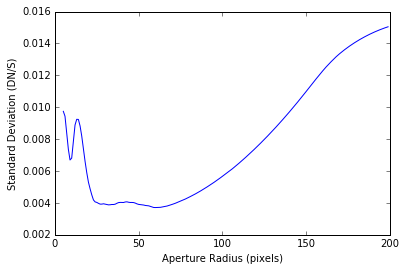

In [7]:
# Plot normalized standard deviation (second data set)
u_new = s_new['Ap_Rad']
v_new = s_new['St_Dev']/s_new['Median_Flux']
plt.plot(u_new, v_new)
plt.ylabel('Standard Deviation (DN/S)')
plt.xlabel('Aperture Radius (pixels)')

In [8]:
# Find minimum deviation and the corresponding aperture radius (second data set)
min_stdev = np.amin(v_new)
best_ap_rad = u_new[v_new.argmin()]
print "The minimum standard deviation is %f" % min_stdev
print "It occurs for the radius r = %f" % best_ap_rad

The minimum standard deviation is 0.003709
It occurs for the radius r = 60.000000


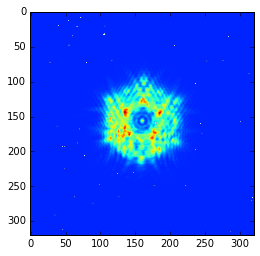

In [9]:
plt.imshow(image2d_new) #Second data set 

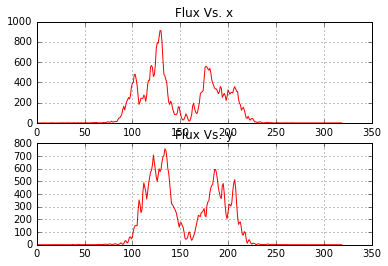

In [52]:
# Figuring out the center for image2d_new
plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_new[:,163],'r-')
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_new[161,:],'r-')
plt.grid(True)

In [18]:
#Flux Vs. time for best ap_rad, 2nd data set, 1st image plane
center = (161,163)
single_new = Table(names=('Flux','Time'))
for hdus_new in hdu_filenames_new:
    hdu_new = fits.open(hdus_new)
    image_new = hdu_new[0].data
    image2d_new = image_new[0,:,:]
    mask = np.isnan(image2d_new) == True
    aperture = CircularAperture(center, r = 60)
    phot_table = aperture_photometry(image2d_new, aperture, mask = mask)
    header_new = hdu_new[0].header
    time = [(header_new["NGROUP"] + 1) * header_new["TGROUP"] * (header_new["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    single_new.add_row([a,b])
    hdu_new.close()
single_new

Flux,Time
float64,float64
4089783.98866,0.0
4100290.47408,22.38012
4077616.04677,44.76024
4084743.339,67.14036
4090760.36821,89.52048
4087877.49425,111.9006
4076293.0976,134.28072
4089921.16115,156.66084
4073852.06619,179.04096


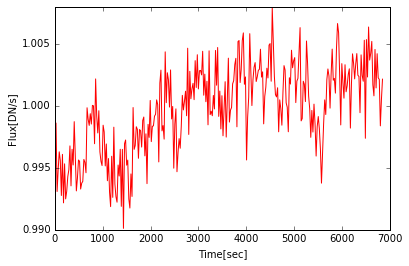

In [20]:
x_new = single_new['Time']
y_new = single_new['Flux']
second_data_plot = plt.plot(x_new, y_new/np.median(y_new), 'r-')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

In [ ]:
# **Everything above this line is 2ND DATA SET, 1ST IMAGE PLANE**
# Everything below: Comparisons

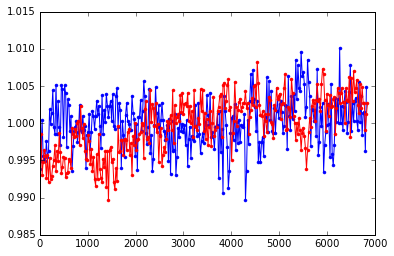

In [53]:
plt.plot(x, y/np.median(y), '.-')  # The data set I have been working on (blue)
plt.plot(x_new, y_new/np.median(y_new), 'r.-')  # The new data set (red)

<Container object of 3 artists>

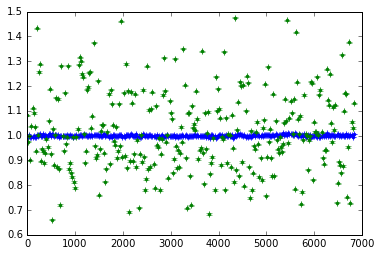

In [69]:
# Light curve with errorbars
plt.errorbar(x, y/np.median(y), xerr = 0, yerr = errors_normalized, fmt='.') # 1st data set, 1st image plane -> Blue
plt.errorbar(x_2, y_2/np.median(y_2), xerr = 0, yerr = errors_normalized_2, fmt='g.') # 1st data set, 2nd image plane -> Green